# Поведінка клієнтів банку: демографічні та фінансові фактори

# Опис даних
Дані для цього проекту були взяті на Kaggle: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

Цей набір даних містить інформацію про клієнтів банку та надає можливості для вивчення взаємозв'язків між демографічними та фінансовими факторами, що можуть впливати на поведінку клієнтів, зокрема на їхнє рішення піти чи залишитися в банку.

### Цей набір даних містить такі колонки:
- **CustomerId**: Унікальний ідентифікатор кожного клієнта.

- **Surname**: Прізвище або ім’я клієнта.

- **Credit Score**: Числове значення, що представляє кредитний рейтинг клієнта.

- **Geography**: Країна, в якій проживає клієнт (Франція, Іспанія або Німеччина).

- **Gender**: Стать клієнта (Чоловік або Жінка).

- **Age**: Вік клієнта.

- **Tenure**: Кількість років, які клієнт обслуговується в банку.

- **Balance**: Баланс рахунку клієнта.

- **NumOfProducts**: Кількість банківських продуктів, якими користується клієнт (наприклад, ощадний рахунок, кредитна картка).

- **HasCrCard**: Чи має клієнт кредитну картку (1 = так, 0 = ні).

- **IsActiveMember**: Чи є клієнт активним (1 = так, 0 = ні).

- **EstimatedSalary**: Оцінена заробітна плата клієнта.

- **Exited**: Чи покинув клієнт банк (1 = так, 0 = ні).

## Імпорт бібліотек та завантаження даних

In [5]:
import warnings

import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

warnings.filterwarnings(action='ignore')

In [6]:
# Зчитаємо дані.
df = pd.read_csv('data/Churn_Modelling.csv')

In [7]:
# Визначимо розмір набору даних.
df.shape
print(f'Набір містить {df.shape[0]} рядків та {df.shape[1]} колонок.')

Набір містить 10002 рядків та 14 колонок.


In [8]:
# Переглянемо перших і останніх 5 рядків даних візуально.
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## Перевірка даних

In [10]:
# Перевіримо назви колонок і типи даних у них.
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# Виявимо, чи є відсутні дані в датасеті.
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

**Висновок:** є по 1 пропущеному значенню в колонках Geography, Age, HasCrCard, IsActiveMember.

Дані можуть бути відсутніми, якщо вони заповнялися вручну або це були необов'язкові поля, які клієнт вирішив пропустити. Можливо у таблиці також містяться записи про нових клієнтів, у яких ще незавершений процес реєстрації.
Оскільки це незначна кількість відсутніх значень і вплив на подальший аналіз буде несуттєвим, то для зручності подальших перетворень і роботи з даними пропоную їх видалити.

In [13]:
# Видалимо відсутні дані.
clean_df = df.dropna()

In [14]:
# Перевіримо дані після видалення.
clean_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Видалимо колонку RowNumber, як непотрібну, оскільки унікальним ідентифікатором клієнта є CustomerId.
clean_df.drop(columns=['RowNumber'], inplace=True)

In [16]:
# Переглянемо, чи успішна операція.
clean_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [17]:
# Перетворимо колонки Geography, Gender, HasCrCard, IsActiveMember та Exited на категоріальні для зручності та оптимізації пам'яті.
for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']:
    clean_df[col] = pd.Categorical(clean_df[col])

In [18]:
# Перетворимо колонку Age, яка зберігає дані про вік користувачів, на тип int.
clean_df['Age'] = clean_df['Age'].astype(int)

In [19]:
# Переглянемо, чи були усіпшними операції з перетворення типів.
clean_df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int32
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [20]:
# Перевіримо, чи є дублікати у наборі даних.
clean_df[clean_df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28,4,130142.79,1,1.0,0.0,38190.78,0


In [21]:
# Видалимо виявлені на попередньому етапі дублікати.
clean_df = clean_df.drop_duplicates()

In [22]:
# Перевіримо, чи не містять числові колонки від'ємних значень.
num_columns = clean_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
negative_values = (num_columns < 0)
has_negative_values = negative_values.any(axis=0)
print(has_negative_values)

CreditScore        False
Age                False
Balance            False
EstimatedSalary    False
dtype: bool


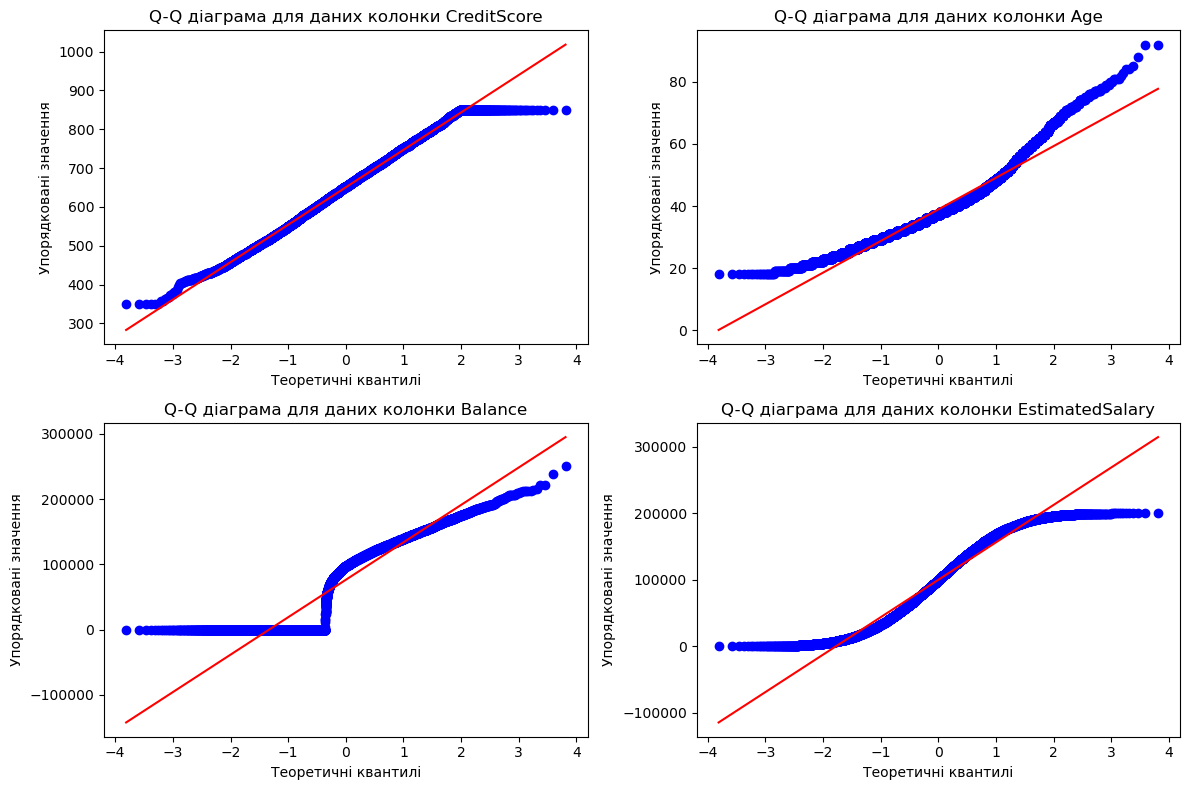

In [23]:
# Здійснимо перевірку вибірок на нормальність за допомогою Q-Q діаграм для числових стовпців CreditScore, Age, Balance, EstimatedSalary.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for index, column in enumerate(num_columns):
    row = index // 2
    col = index % 2
    stats.probplot(clean_df[column], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q діаграма для даних колонки {column}')
    axes[row, col].set_xlabel('Теоретичні квантилі')
    axes[row, col].set_ylabel('Упорядковані значення')
    
plt.tight_layout()
plt.show()

**Висновки:**
- Дані колонки CreditScore загалом розподілені нормально, проте мають певні відхилення у хвостах, що є досить нормальним для такого типу даних.
- Схожий результат ми маємо і для даних колонки Age, далі ми дослідимо чому так відбулося і якого саме віку людей найбільше у вибірці.
- Розподіл даних у колонці Balance з очевидними відхиленнями. Це може статися через те, що більшість клієнтів мають нульовий баланс, а невелика частина клієнтів - дуже високий.
- Колонка з даними EstimatedSalary має відхилення на обох кінцях, це може відбуватися через наявність водночас як екстремально низьких, так екстремально високих значень заробітної плати.

In [25]:
# Дослідимо дані у цих колонках детальніше за допомогою статистичних показників. Для зручності змінимо відображення до 2 цифр після коми.

with pd.option_context('display.precision', 2):
    display(clean_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe())

,CreditScore,Age,Balance,EstimatedSalary
count,9996.00,9996.00,9996.00,9996.00
mean,650.50,38.92,76476.26,100106.70
std,96.62,10.49,62397.12,57513.31
min,350.00,18.00,0.00,11.58
25%,584.00,32.00,0.00,51002.11
50%,652.00,37.00,97173.29,100238.11
75%,717.25,44.00,127639.37,149400.11
max,850.00,92.00,250898.09,199992.48


**Висновки:**
- У CreditScore значення розподілені досить нормально, тому що бали кредитного рейтингу зазвичай мають перебувати у певному обмеженому діапазоні значень. Проте є певна різниця між мінімальними і максимальними значеннями, тому ми і бачили відхилення у хвостах на Q-Q на діаграмі.
- У колонці Age мінімальне значення - 18, тобто всі особи у вибірці повнолітні, що є нормальним для клієнтів банку. 75% усіх користувачів мають вік менший ніж 44 років. Тому і на Q-Q діаграмі ми мали такий результат розподілу з відхиленнями у хвостах, адже дані переважно зосереджені на користувачах середнього віку.
- 25% значень колонки Balance мають нульове значення, 75% клієнтів мають на рахунку - менше ніж 127639.37, а максимальне значення у цій колонці - 250898.09 (що майже удвічі більше 75 персентиля), тому ми і бачили таке значне відхилення на Q-Q діаграмі.
- Колонка з даними EstimatedSalary має суттєву різницю між мінімальним (значення 11,58 виглядає як аномальне) і максимальним значенням. Також, враховуючи різницю між 25-м (51002.11) і 75-м персентилем(149400.11), можемо зробити висновок, що більшість клієнтів має досить велику заробітну плату.

**Перейдемо до глибшого дослідження даних і пошуку інсайтів.**

**1. Розподіл середньої оціненої заробітної плати за статтю та країною.**

In [29]:
mean_salary_by_gender = clean_df.pivot_table(index = 'Geography', columns = 'Gender', values = 'EstimatedSalary', aggfunc = {'EstimatedSalary': ['mean']})
display(mean_salary_by_gender.style.format("{:.2f}").background_gradient(low=0.9, high=1.0, cmap='bwr'))

**Висновок:** найбільшу середню оцінену заробітну плату мають жінки у Німеччині, а також чоловіки у Франції. Натомість найменшу середню оцінену заробітну плату бачимо у чоловіків в Іспанії та жінок у Франції. Оскільки ми маємо лише дані оціненої заробітної плати, яка може бути визначена на основі різних факторів, таких як освіта, посада, сімейний стан тощо, цей показник може не відображати реальний рівень заробітної плати клієнтів банку в цих країнах. Проте далі буде корисно використати ці дані, щоб порівняти їх з іншими показниками (наприклад, балансом або кількістю продуктів клієнта), щоб дослідити можливі закономірності. 

**2. Візуалізація розподілу віку клієнтів банку.**

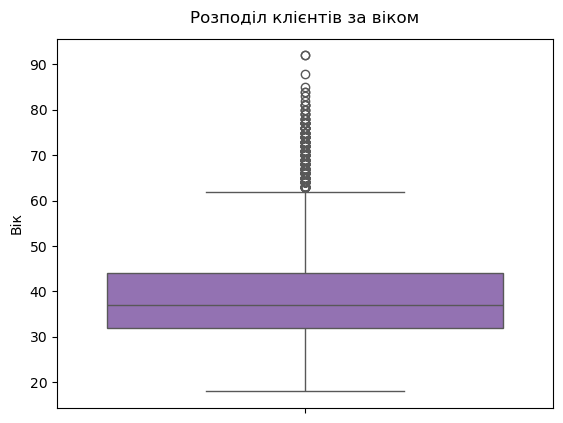

In [32]:
ax = sns.boxplot(y='Age', data=clean_df, color='tab:purple')
ax.set_title('Розподіл клієнтів за віком', pad=12)
ax.set_xlabel('')
ax.set_ylabel('Вік')
plt.show();

**Висновок:** результати розподілу даних щодо віку клієнтів банку підтверджують попереднє припущення про те, що переважна більшість клієнтів досліджуваного банку - це люди середнього віку. Проте також ми бачимо, що є "викиди" значень, тобто є значна кількість клієнтів від 62 до 92 років. Ця група є аномальною для досліджуваного набору даних, а також не дуже фінансово активною і відповідно користується невеликою кількість банківських продуктів (переважно отримує виплати, рідше розміщує депозити і не користується кредитними продуктами, оскільки для них банки мають обмеження за віком).

**3. Розподіл тривалості банківського досвіду клієнтів.**

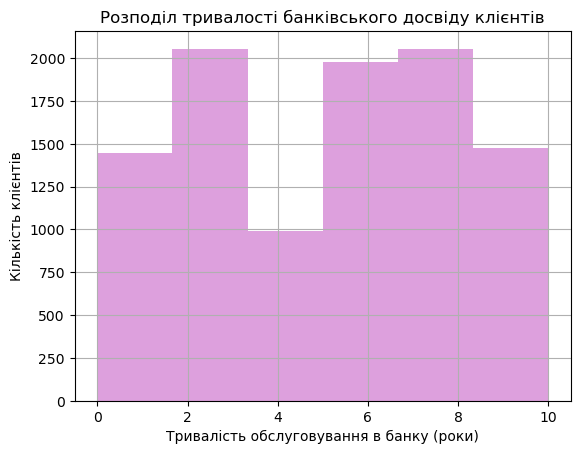

In [35]:
clean_df['Tenure'].hist(bins=6, color='plum', alpha=1)
plt.title('Розподіл тривалості банківського досвіду клієнтів', fontsize=12)
plt.xlabel('Тривалість обслуговування в банку (роки)', fontsize=10)
plt.ylabel('Кількість клієнтів', fontsize=10)
plt.show();

**Висновок:** найбільша кількість людей з вибірки є клієнтами банку від 1,5 до 3-х років, а також від 7-ми до трохи більше 8-ми років. Водночас ми маємо менше даних про клієнтів, які почали обслуговуватися в банку зовсім нещодавно (від 0 до 1,5 року), а також значно менша чисельнність тих, хто має середню тривалість стосунків з банком (від 3-х до 5-ти років).

Далі пропоную дослідити, чи має вплив тривалість перебування клієнта у банку на його кредитний рейтинг.

**4. Вплив тривалості перебування в банку на кредитний рейтинг клієнтів за країнами.**

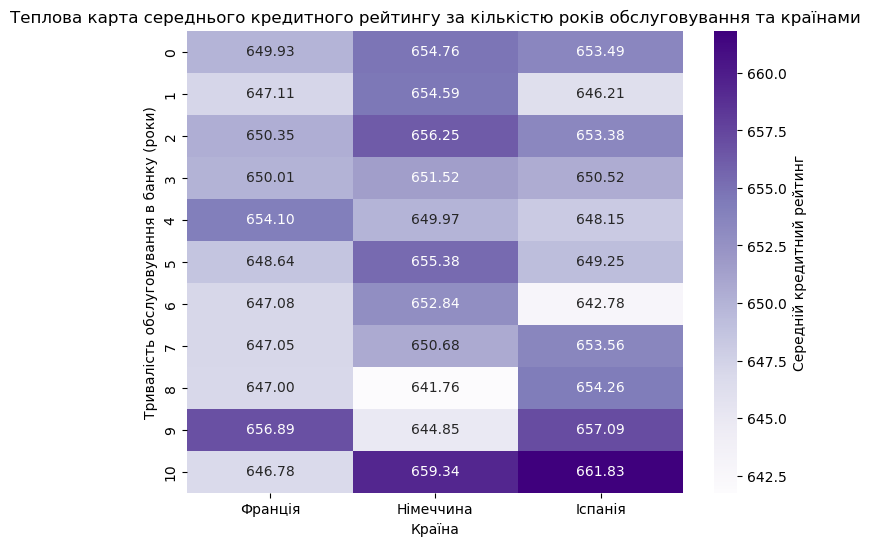

In [38]:
credit_score_tenure_geo = clean_df.pivot_table(index='Tenure', columns='Geography', values='CreditScore', aggfunc='mean')

country_mapping = {
    'France': 'Франція',
    'Spain': 'Іспанія',
    'Germany': 'Німеччина'
}

plt.figure(figsize=(8, 6))
ax = sns.heatmap(credit_score_tenure_geo, annot=True, fmt=".2f", cmap='Purples', cbar_kws={'label': 'Середній кредитний рейтинг'})
ax.set_xticklabels(credit_score_tenure_geo.columns.map(country_mapping), ha='center')
plt.title("Теплова карта середнього кредитного рейтингу за кількістю років обслуговування та країнами")
plt.xlabel("Країна")
plt.ylabel("Тривалість обслуговування в банку (роки)")
plt.show();

**Висновок:** на тепловій мапі можемо бачити, що не має значної залежності між кількістю років, протягом яких людина є клієнтом банку, і її кредитним рейтингом. Найбільш ймовірно, що кредитний рейтинг обчислюється на основі рівня доходу, освіти, професії, наявності нерухомого майна людини та попередньої кредитної історії, і тривалість стосунків клієнта з конкретним банком суттєвого значення не мають. Також можемо побачити, що дані середнього кредитного рейтингу для клієнтів у різних країнах досить схожі, що може свідчити про те, що дані були згенеровані. На наступному етапі пропоную переглянути детальніше розподіл значень кредитного рейтингу для різних країн.

**5. Розподіл значень кредитного рейтингу для різних країн.**

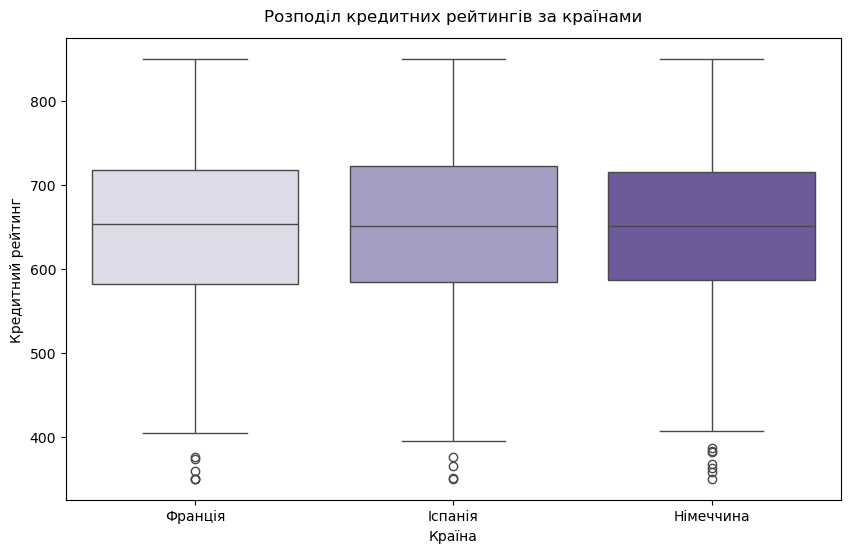

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='CreditScore', data=clean_df, palette='Purples')
plt.xticks(ticks=range(len(clean_df['Geography'].unique())), 
           labels=clean_df['Geography'].unique().map(country_mapping), 
           ha='center')
plt.title('Розподіл кредитних рейтингів за країнами', pad=12)
plt.xlabel('Країна')
plt.ylabel('Кредитний рейтинг')
plt.show();

**Висновок:** результати візуалізації boxplot підтверджують, що значення кредитних рейтингів за різними країнами мають незначні відмінності. Розкид даних трохи менший в Іспанії, а мінімальне значення найнижче у Німеччині, найбільше "викидів" значень мають значення кредитного рейтингу клієнтів з Іспанії, що може бути пов'язано з аномаліями в даних.

Це може бути зумовлено такими чинниками:
-  дані можуть бути згенеровані або оброблені так, що це створює їхній нерівномірний розподіл;
- можливо кредитний рейтинг у країнах Європи розраховується за однаковим алгоритмом, і має бути не нижче певного порогового значення, щоб клієнт міг обслуговуватися у банку і тому клієнти з нижчими рейтингами можуть бути відсутніми у вибірці.

**6. Вплив оціненої заробітної плати на кредитний рейтинг клієнта.**

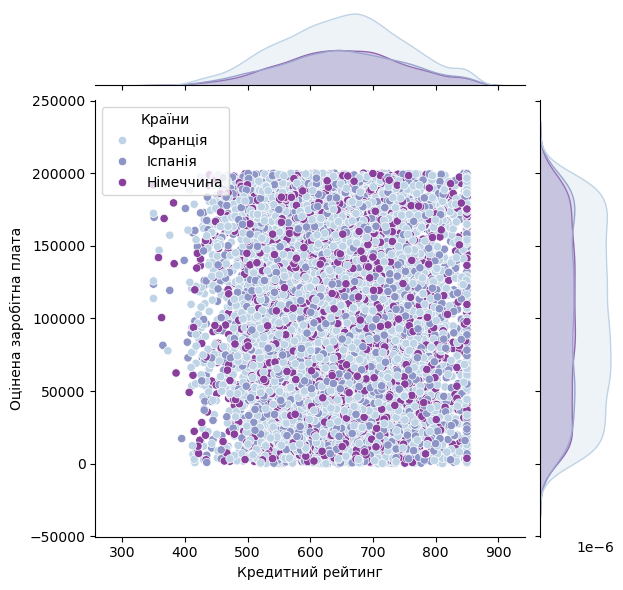

In [44]:
g = sns.jointplot(data=clean_df, x='CreditScore', y='EstimatedSalary', hue='Geography', palette='BuPu')
g.set_axis_labels('Кредитний рейтинг', 'Оцінена заробітна плата')
legend = g.ax_joint.get_legend()
new_labels = ['Франція', 'Іспанія', 'Німеччина']
for text, new_label in zip(legend.texts, new_labels):
    text.set_text(new_label)
legend.set_title('Країни')
plt.show();

**Висновок:** на графіку ми бачимо, що очевидної залежності між зростанням оціненої заробітної плати та кредитним рейтингом немає. 

- Точки даних щільно розташовані уздовж як і осі х, так і осі у, а також утворюють форму квадрату. Це може свідчити проте те, що дані досліджуваних колонок CreditScore та EstimatedSalary мають досить обмежені значення (можливо багато однакових значень).
- Візуально здається, що найбільше даних ми маємо для клієнтів з Франції. У французьких клієнтів з кредитним рейтингом близько 650 найбільша кількість значень оцінених заробітних плат, що сягають до 200000, а також багато користувачів мають досить велике значення кредитного рейтингу (близько 850), для різних значень оціненої заробітної плати (від 11 до 200000). Тобто очевидної кореляції немає.

**Розрахуємо коефіцієнт кореляції Пірсона, щоб пітвердити або спростувати припущення.**

In [47]:
correlation = clean_df[['CreditScore', 'EstimatedSalary']].corr()
print(correlation)

                 CreditScore  EstimatedSalary
CreditScore         1.000000        -0.001082
EstimatedSalary    -0.001082         1.000000


**Висновок:** розрахункове значення коефіцієнта кореляції Пірсона між CreditScore та EstimatedSalary становить -0.001082, що підтверджує нашу гіпотезу про те, що немає практично ніякої лінійної кореляції між кредитним рейтингом і оціненою зарплатою.

**7. Порівняння кількості активних та неактивних клієнтів.**

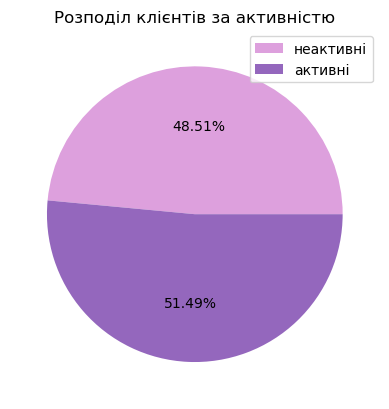

In [50]:
active_customer = clean_df.groupby('IsActiveMember')['CustomerId'].count()

plt.pie(active_customer, autopct = '%1.2f%%', colors=['plum', 'tab:purple'])
plt.title('Розподіл клієнтів за активністю')
plt.legend(labels = ['неактивні', 'активні'])
plt.show();

**Висновок:** кількість активних і неактивних користувачів у нашому наборі даних майже однакова, є невелика різниця у 3%.

Далі пропоную дослідити можливу залежність між кількістю продуктів (NumOfProducts) і активністю користувача (IsActiveMember).

**8. Вплив активності користувача на кількість обраних продуктів.**

In [53]:
#Виконаємо перетворення колонки "IsActiveMember" на числову, щоб мати змогу провести t-тест.
clean_df['IsActiveMember'] = pd.to_numeric(clean_df['IsActiveMember'], errors='coerce')
print(clean_df['IsActiveMember'].dtype)

float64


In [54]:
active_products = clean_df[clean_df['IsActiveMember'] == 1]['NumOfProducts']
inactive_products = clean_df[clean_df['IsActiveMember'] == 0]['NumOfProducts']

t_stat, p_value = stats.ttest_ind(active_products, inactive_products)

print(f"T-статистика: {t_stat:.2f}, p-значення: {p_value:.4f}")

T-статистика: 0.96, p-значення: 0.3354


**Висновок:** оскільки p-значення результату t-тесту більше 0,05 (p = 0.3354), ми не можемо відкинути нульову гіпотезу. Тобто між активністю користувача та кількістю продуктів, якими він користується, немає статистично значущої різниці.

**9. Кількість продуктів клієнтів у розрізі країн.**

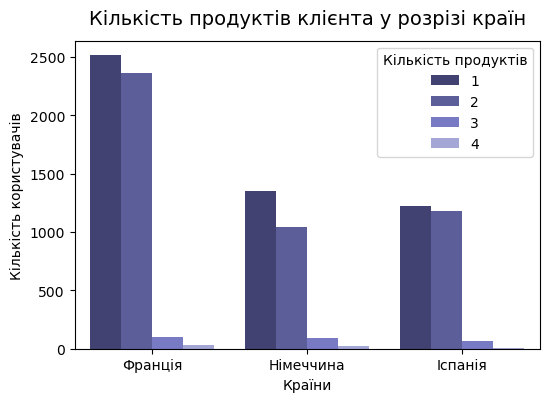

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(data=clean_df, x='Geography', hue='NumOfProducts', palette='tab20b')
plt.title('Кількість продуктів клієнта у розрізі країн', fontsize=14, pad=12)
plt.xlabel('Країни')
plt.ylabel('Кількість користувачів')
plt.legend(title='Кількість продуктів')
country_mapping = {'France': 'Франція', 'Germany': 'Німеччина', 'Spain': 'Іспанія'}
unique_countries = clean_df['Geography'].value_counts().index
plt.xticks(ticks=range(len(unique_countries)), labels=[country_mapping[country] for country in unique_countries])
plt.show();

**Дані гістограми дозволяють зробити наступні спостереження:**
- найбільше інформації про кількість продуктів, які використовує одна особа, ми маємо для користувачів з Франції;
- переважна більшість користувачів з усіх країн обирає лише один продукт, в той час як трохи менше користувачів мають два продукти;
- в Іспанії майже однакова кількість клієнтів обирає один або два продукти;
- число користувачів, які мають три або чотири продукти, є дуже низьким у нашій вибірці.

**10. Розподіл кількості людей з кредитними картками за віком.**

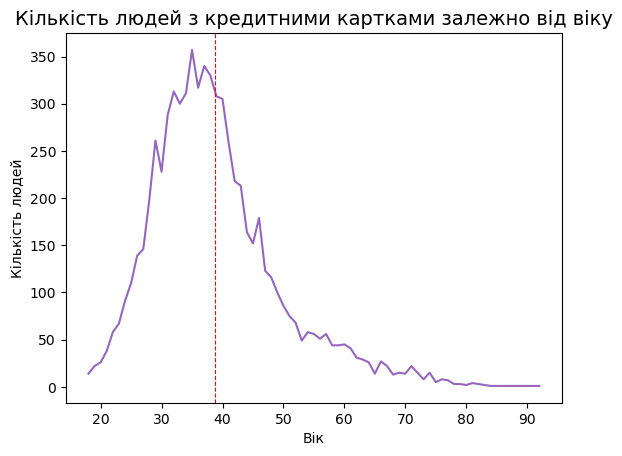

In [60]:
has_cr_card = clean_df[clean_df['HasCrCard'] == 1]

has_cr_card_by_age = has_cr_card.groupby('Age').size().reset_index(name='Count')
mean_has_cr_card_by_age = has_cr_card['Age'].mean()

sns.lineplot(data=has_cr_card_by_age, x='Age', y='Count', color='tab:purple')
plt.title('Кількість людей з кредитними картками залежно від віку', fontsize=14)
plt.axvline(x=mean_has_cr_card_by_age, color='red', linestyle='--', linewidth=0.8)
plt.xlabel('Вік')
plt.ylabel('Кількість людей')
plt.show();

**Висновки:** 
- найбільше користувачів кредитних карток належать до вікової категорії від 32 до 42 років, тобто це люди середнього віку;
- середній вік типового власника кредитної картки становить 38 років;
- різкий спад користувачів відбувається після 52 років;
- після 82 років кількість власників кредитних карток різко зменшується, що є логічним, оскільки банки часто мають вікові обмеження для осіб, які бажають користуватися кредитним лімітом.

**11. Сегментація клієнтів за рівнем балансу на рахунку.**

У банківській сфері часто використовують практику класифікації клієнтів на основі суми, яку вони розміщують у банку. 

Класифікування клієнтів дає змогу:
- персоналізувати обслуговування та покращити взаємодії з клієнтами, дозволяючи запропонувати їм відповідні фінансові продукти та послуги;
- обрати правильну стратегію рекомендацій;
- оптимізувати маркетингові кампанії;
- ефективніше управляти ризиками та доходами. 

У цьому випадку ми спробуємо здійснити сегментацію клієнтів за їхнім балансом, використовуючи метод класифікації K-середніх. Цей метод дозволяє адаптуватися до природного розподілу даних щодо балансу серед клієнтів. Це важливо, оскільки ми вже встановили, що 25% усіх клієнтів мають на балансі 0. Інші методи класифікації могли б спотворити результати через такий значний відсоток клієнтів з нульовим балансом.

Для подальшого аналізу ми розділимо клієнтів, орієнтуючись на рівень їхнього балансу:
- **basic** — клієнти з мінімальним балансом;
- **middle** — клієнти зі середнім балансом;
- **premium** — клієнти з високим балансом.

In [64]:
balance = clean_df[['Balance']]  

kmeans = KMeans(n_clusters=3, random_state=42)
clean_df['BalanceCategory'] = kmeans.fit_predict(balance)

In [65]:
clean_df['BalanceCategory'] = clean_df['BalanceCategory'].replace({0: 'basic', 1: 'middle', 2: 'premium'})
clean_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceCategory
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,basic
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,premium
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,middle
3,15701354,Boni,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,basic
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1,premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1.0,0.0,96270.64,0,basic
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1.0,1.0,101699.77,0,premium
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0.0,1.0,42085.58,1,basic
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,premium


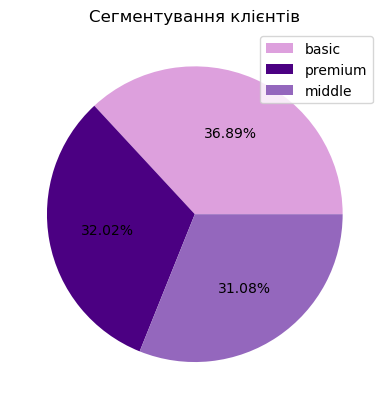

In [66]:
balance_cat = clean_df.groupby('BalanceCategory')['CustomerId'].count().sort_values(ascending=False)

plt.pie(balance_cat, autopct = '%1.2f%%', colors=['plum', 'indigo', 'tab:purple'])
plt.title('Сегментування клієнтів')
plt.legend(labels = clean_df['BalanceCategory'])
plt.show();

**Висновки:** 
- очікувано, що найбільше клієнтів є у групі basic, оскільки більшість клієнтів, ймовірно, мають менші баланси на рахунках;
- цікаво, що виявилося досить багато клієнтів у premium та middle сегментах. Однак, враховуючи середнє значення балансу на рахунку (76476.26), можна зробити висновок, що у вибірці є значна кількість клієнтів з досить великими сумами на рахунках;
- загалом різниця між трьома групами (basic, middle, premium) не є суттєвою, тому жодна з цих груп не домінує в загальному розподілі.

**12. Відсоток відтоку для різних категорій клієнтів.**

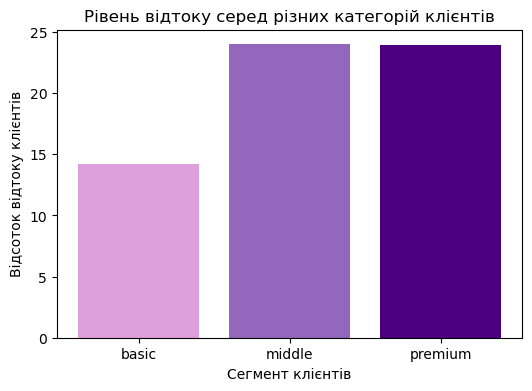

In [69]:
clean_df['Exited'] = clean_df['Exited'].astype(int)

bal_cat_exited = clean_df.groupby('BalanceCategory')['Exited'].agg(['sum', 'count'])
bal_cat_exited ['ExitPercentage'] = (bal_cat_exited ['sum'] / bal_cat_exited ['count']) * 100

plt.figure(figsize=(6, 4))
plt.bar(bal_cat_exited .index, bal_cat_exited ['ExitPercentage'], color=['plum', 'tab:purple', 'indigo'])
plt.title('Рівень відтоку серед різних категорій клієнтів', fontsize=12)
plt.xlabel('Сегмент клієнтів', fontsize=10)
plt.ylabel('Відсоток відтоку клієнтів', fontsize=10)
plt.show();

**Висновки:** клієнти сегментів middle та premium мають однакові відсотки відтоку - близько 24%, натомість категорія клієнтів basic має значно кращі показники - 14%. Враховуючи це, варто звернути увагу на подальшу роботу з клієнтами сегменту middle та premium, адже їх відтік вищий. Це може свідчити про потребу в додаткових заходах лояльності, спеціальних пропозиціях або покращенні обслуговування для зниження ризику відтоку. Можливо, варто зосередитись на покращенні умов для цих клієнтів, щоб зберегти їх в банку.

# Загальні висновки

Після проведеного аналізу даних клієнтів банку з Іспанії, Франції та Німеччини, ми можемо зробити низку важливих висновків, які дозволяють краще зрозуміти специфіку клієнтської бази:

1. Показник середньої оціненої заробітної плати має дуже незначний розкид для людей різних статей, які проживають у різних країнах. Кореляції між цим показником і кредитним рейтингом не виявлено, припускаємо, що це пов'язано з тим, що на оцінену заробітню плату може впливати багато різних факторів (освіта, посада, сімейний стан тощо) і її частка для розрахунку кредитного рейтингу не дуже суттєва. Доцільно було б мати дані про реальну середню місячну заробітню плату клієнта, щоб оцінити його спроможність обслуговувати кредитні зобов'язання.
   
2. Найбільша кількість людей з вибірки є клієнтами банку від 1,5 до 3-х років, а також від 7-ми до 8-ми років, менше даних про нових клієнтів і клієнтів з середнім терміном. Впливу тривалості обслуговування в банку на кредитний рейтинг клієнта теж не виявлено. Вірогідно, що кредитний рейтинг обчислюється на основі рівня доходу, освіти, професії, наявності нерухомого майна людини та попередньої кредитної історії, і тривалість стосунків клієнта з конкретним банком суттєвого значення не мають. Тому далі було б корисно доповнити наш набір такими даними, що дали б змогу більш точно дослідити які саме показники формують кредитний рейтинг клієнта.
   
3. Активних і неактивних користувачів у вибірці майже однаково (різниця у 3%). Це свідчить про те, що ми маємо дуже велику кількість клієнтів (майже 49%), які, ймовірно, мають рахунки у банку, проте або не користуються ними або користуються нечасто (можливо лише для отримання виплат). Тому було б доцільно покращити взаємодію з цією групою (запустити рекламну кампанію, стимулювати виконати певні умови, щоб отримати підвищену відсоткову ставку для депозитів, запропонувати додаткові послуги тощо).

4. Щодо віку користувачів кредитних карток, то основна частина — це люди середнього віку, проте є значна кількість аномальних даних серед осіб старшого віку, які зазвичай мало користуються банківськими продуктами. Така ситуація актуальна і загалом для усіх клієнтів банку, середній вік клієнтів - 37 років. Варто подумати, як можна залучити молодшу аудиторію (від 18 років), тут можна звернути увагу на поліпшення мобільного додатку та отримання додаткових бонусів за його використання.
    
5. Використання сегментування клієнтів на основі балансу відображає загальну банківську практику, тому за допомогою інструмента KMeans ми поділили усіх користувачів на три групи (basic, middle, premium) та виявили, що у досліджуваному наборі даних жодної група суттєвої кількісної переваги немає.
 
6. Відтік клієнтів за категоріями балансу вказує на найбільший відтік серед сегментів middle та premium, що потребує уваги до покращення умов для цих клієнтів (підвищення класу карток, проведення розіграшів за збільшення кількості розрахунків, додаткових бонусів із можливим залученням партнерів).

Загалом отримані результати дають змогу розробити індивідуалізовані стратегії обслуговування клієнтів і вдосконалити банківські продукти.